## This project perform wine quality prediction on wine dataset using three different algorithms Logistic regression, SVM, XGBoost
### Citation reference <a href="https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/?ref=lbp">here</a> 
### Dataset is downloaded from UCI https://archive.ics.uci.edu/dataset/186/wine+quality

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

#### loading the dataset and looking at first few records

In [81]:
wine = pd.read_csv('datasets/wine_quality/winequality-red.csv',sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [83]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [84]:
wine.shape

(1599, 12)

In [85]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


##### Exploratory data analysis .data does not have null values

In [86]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [87]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### visualization of data using histogram for comparison
#### This shows residual sugar, free and total sulfur dioxide and alchol levels are outside the normal range compared to other features

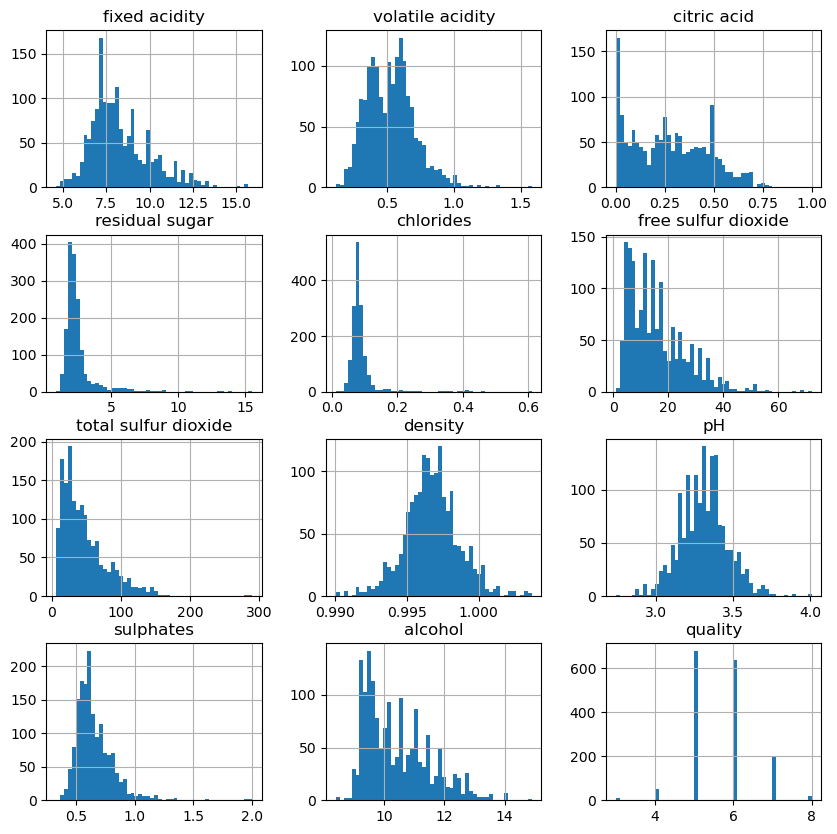

In [88]:
hist = wine.hist(bins = 50, figsize = (10,10))

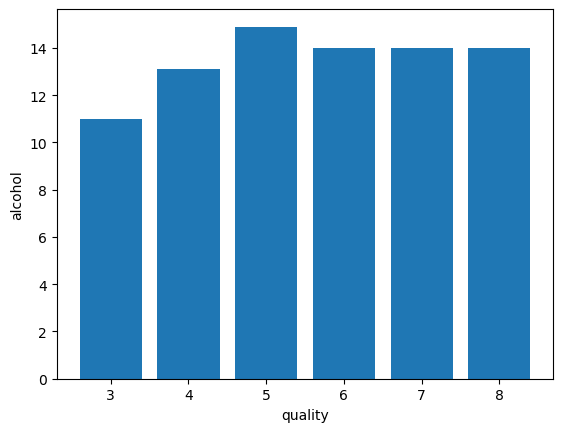

In [89]:
fig, ax = plt.subplots()
ax.bar(wine['quality'],wine['alcohol'])
ax.set_xlabel('quality')
ax.set_ylabel('alcohol')
plt.show()

In [90]:
cols = wine.columns.values.tolist()

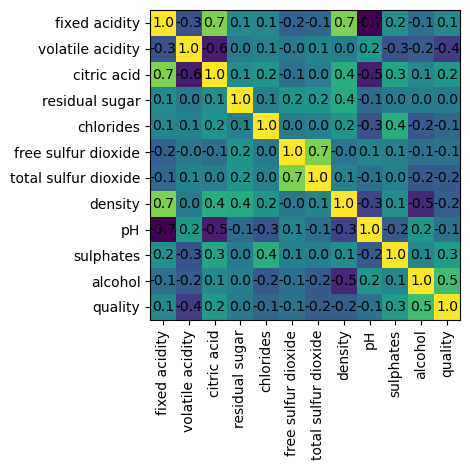

In [91]:
fig,ax = plt.subplots()
ax.set_xticks(np.arange(len(cols)),labels = cols,rotation = 90)
ax.set_yticks(np.arange(len(cols)),labels = cols)
corr = wine.corr()
ax.imshow(corr)
labels = corr.values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        ax.text(a, b, '{:.1f}'.format(labels[b, a]), ha='center', va='center', color='black')
fig.tight_layout()
plt.show()

### dropping one of the features for sulfur dioxide since both are highly correlated

In [92]:
wine = wine.drop(labels = ['total sulfur dioxide'],axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5


## model development
#### add a column from quality column to set target feature based on threshold value
#### split to train and test dataset for model training and testing

In [93]:
wine['best_quality'] = [1 if x > 5 else 0 for x in wine['quality']]

In [94]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0


In [95]:
target = wine['best_quality']
wine = wine.drop(labels = ['best_quality','quality'],axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4


### splitting the data to test and train data

In [104]:
x_train,x_test,y_train,y_test =  train_test_split(wine,target, test_size = 0.3, random_state = 5)

In [105]:
print('training data size')
x_train.shape

training data size


(1119, 10)

In [106]:
print('testing data size')
x_test.shape

testing data size


(480, 10)

### normalization

In [107]:
x_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,8.387221,0.525357,0.273396,2.539589,0.087983,15.758266,0.996786,3.306845,0.662073,10.422446
std,1.765863,0.178721,0.196955,1.348532,0.049596,10.348721,0.001877,0.154228,0.176364,1.052853
min,4.900000,0.120000,0.000000,0.900000,0.012000,1.000000,0.990070,2.740000,0.330000,8.500000
25%,7.200000,0.390000,0.090000,1.900000,0.071000,7.000000,0.995650,3.200000,0.550000,9.500000
50%,8.000000,0.520000,0.260000,2.200000,0.080000,13.000000,0.996800,3.310000,0.620000,10.200000
75%,9.300000,0.635000,0.435000,2.600000,0.091000,22.000000,0.997870,3.400000,0.730000,11.100000
max,15.900000,1.330000,1.000000,15.500000,0.611000,72.000000,1.003200,4.010000,2.000000,14.900000


In [108]:
scaler = MinMaxScaler()
x_train_minmax = scaler.fit_transform(x_train)
x_train_minmax

array([[0.21818182, 0.2231405 , 0.31      , ..., 0.52755906, 0.1257485 ,
        0.140625  ],
       [0.16363636, 0.28099174, 0.24      , ..., 0.51181102, 0.16167665,
        0.328125  ],
       [0.23636364, 0.37190083, 0.02      , ..., 0.48818898, 0.17365269,
        0.359375  ],
       ...,
       [0.36363636, 0.59504132, 0.34      , ..., 0.2992126 , 0.08982036,
        0.09375   ],
       [0.71818182, 0.14876033, 0.74      , ..., 0.36220472, 0.26347305,
        0.359375  ],
       [0.18181818, 0.32231405, 0.23      , ..., 0.51968504, 0.30538922,
        0.421875  ]])

In [109]:
x_test_minmax = scaler.transform(x_test)
x_test_minmax

array([[0.20909091, 0.4214876 , 0.        , ..., 0.49606299, 0.1497006 ,
        0.078125  ],
       [0.60909091, 0.2892562 , 0.44      , ..., 0.50393701, 0.31736527,
        0.21875   ],
       [0.25454545, 0.69421488, 0.2       , ..., 0.48818898, 0.06586826,
        0.375     ],
       ...,
       [0.27272727, 0.04958678, 0.4       , ..., 0.46456693, 0.35928144,
        0.4375    ],
       [0.45454545, 0.33884298, 0.57      , ..., 0.35433071, 0.25748503,
        0.484375  ],
       [0.17272727, 0.30578512, 0.22      , ..., 0.52755906, 0.2994012 ,
        0.4375    ]])

--------------
LogisticRegression() : 
Training ROC AUC Score :  0.7307459981878588
Testing ROC AUC Score :  0.7519806376347268
Training Accuracy :  0.7310098302055407
Testing Accuracy :  0.75
Training Average Precision score :  0.699631320631783
Testing Average Precision score :  0.7154590330876641
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       227
           1       0.79      0.72      0.75       253

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480



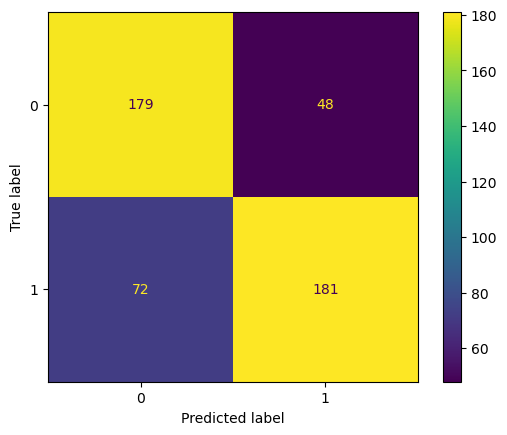

--------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training ROC AUC Score :  1.0
Testing ROC AUC Score :  0.7972697671988995
Training Accuracy :  1.0
Testing Accuracy :  0.7958333333333333
Training Average Precision score :  1.0
Testing Average Precision score :  0.760392663919490

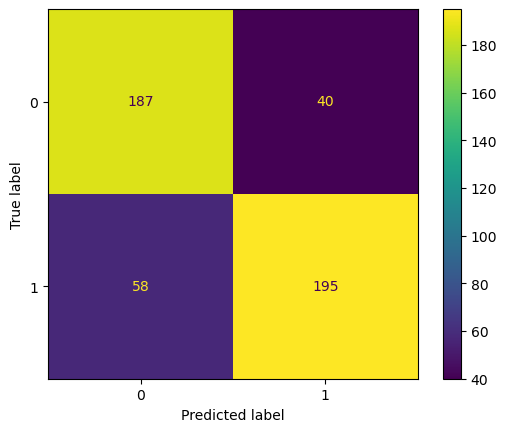

--------------
SVC() : 
Training ROC AUC Score :  0.779124388723597
Testing ROC AUC Score :  0.7654228552523898
Training Accuracy :  0.7774798927613941
Testing Accuracy :  0.7625
Training Average Precision score :  0.748378177200655
Testing Average Precision score :  0.731555012549258
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       227
           1       0.81      0.71      0.76       253

    accuracy                           0.76       480
   macro avg       0.77      0.77      0.76       480
weighted avg       0.77      0.76      0.76       480



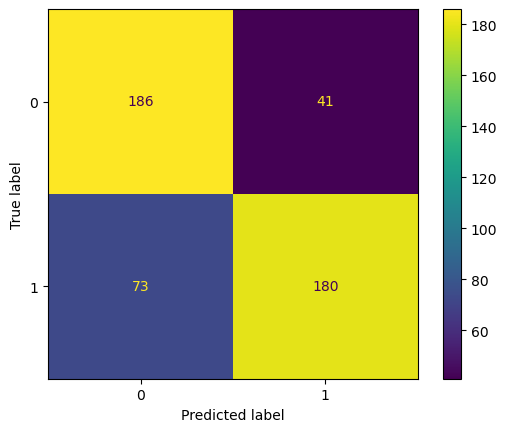

In [123]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
for i in range(3):
    print('--------------')
    models[i].fit(x_train_minmax, y_train)
    train_prediction = models[i].predict(x_train_minmax)
    test_prediction =  models[i].predict(x_test_minmax)
    print(f'{models[i]} : ')
    print('Training ROC AUC Score : ', metrics.roc_auc_score(y_train, train_prediction))
    print('Testing ROC AUC Score : ', metrics.roc_auc_score(y_test, test_prediction))
    
    print('Training Accuracy : ', metrics.accuracy_score(y_train, train_prediction))
    print('Testing Accuracy : ', metrics.accuracy_score(y_test, test_prediction))
    
    print('Training Average Precision score : ',metrics.average_precision_score(y_train, train_prediction))
    print('Testing Average Precision score : ',metrics.average_precision_score(y_test, test_prediction))

    cr = metrics.classification_report(y_test, test_prediction)
    print(cr)
    
    cm = metrics.confusion_matrix(y_test, test_prediction)
    cm_plt = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[i].classes_)
    cm_plt.plot()
    plt.show()

##### based on accuracy and precision scores we can conclude that the XGBClassifer works best